In [16]:
#手書き文字を主成分分析する
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

digits=datasets.load_digits()
X,y,target_names=digits.data,digits.target,digits.target_names

#主成分分析をした後、分類手法を試してみる。
#例えば決定木の精度を上げることができるか
pca=PCA(n_components=20)
pca.fit(X)
X_r = pca.transform(X)
#Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.sum()

explained variance ratio: [ 0.14890594  0.13618771  0.11794594  0.08409979  0.05782415  0.0491691
  0.04315987  0.03661373  0.03353248  0.03078806  0.02372339  0.02272696
  0.01821862  0.01773846  0.01467061  0.01409661  0.01318479  0.01248106
  0.01017694  0.00905487]


0.89429907997778013

In [17]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/sugakubunka/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>

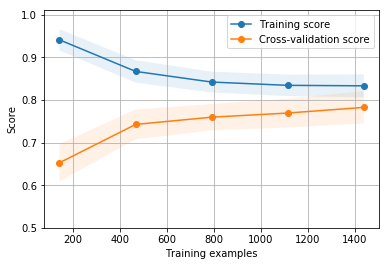

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title =''
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=5)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/Users/sugakubunka/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>

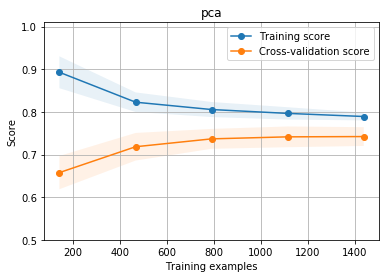

In [19]:
title ='pca'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=5)
plot_learning_curve(estimator, title, X_r, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

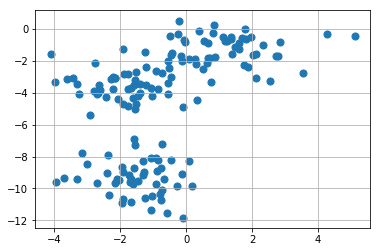

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=150, n_features=2,
               centers=3, random_state=2)
plt.scatter(X[:,0],X[:,1],marker='o',s=50)
plt.grid()

In [33]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, init='random',
          n_init=10, max_iter=300, tol=1e-4)
y_km=km.fit_predict(X)
print('Distortion: %.2f' % km.inertia_)

Distortion: 305.24


In [34]:
km2=KMeans(n_clusters=2, init='random',
           n_init=10, max_iter=300,tol=1e-4)
y_km2=km2.fit_predict(X)
print('Distortion: %.2f' % km2.inertia_)

Distortion: 665.14


In [35]:
from sklearn.cluster import KMeans
kmp=KMeans(n_clusters=3, init='k-means++',
           n_init=10, max_iter=300,tol=1e-4)
y_kmp=kmp.fit_predict(X)
print('Distortion: %.2f' % kmp.inertia_)

Distortion: 305.24


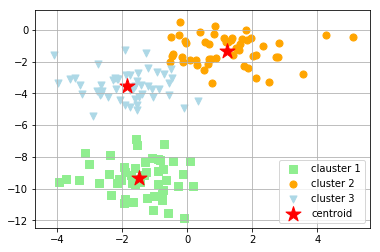

In [36]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='clauster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroid')
plt.legend()
plt.grid()

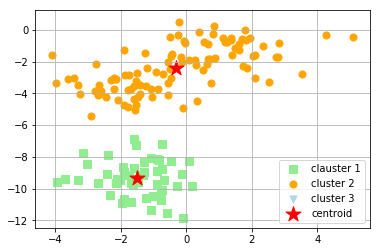

In [37]:
plt.scatter(X[y_km2==0,0],X[y_km2==0,1],s=50,c='lightgreen',marker='s',label='clauster 1')
plt.scatter(X[y_km2==1,0],X[y_km2==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km2==2,0],X[y_km2==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroid')
plt.legend()
plt.grid()

In [38]:
?KMeans

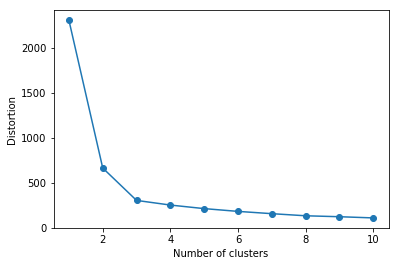

In [40]:
distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [45]:
#クラスタリング結果からシルエット図を出力する関数を定義
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
def plot_silhouette(X,y_cl):
    cluster_labels=np.unique(y_cl)
    n_clusters=cluster_labels.shape[0]
    silhouette_vals=silhouette_samples(X,y_cl,metric='euclidean')
    y_ax_upper,y_ax_lower=0,0
    yticks=[]
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals=silhouette_vals[y_cl==c]
        c_silhouette_vals.sort()
        y_ax_upper+=len(c_silhouette_vals)
        color=cm.jet(float(i)/n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,
                 height=1.0,edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower+=len(c_silhouette_vals)
    silhouette_avg=np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,color='red',linestyle='--')
    plt.yticks(yticks,cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

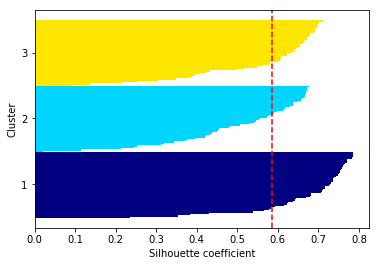

In [46]:
plot_silhouette(X,y_km)